# COVID data for three countries

COVID-19 confirmed cases will be imported for three countries (India, Germany and Italy) 

In [22]:
import pandas as pd
import numpy as np
import missingno as mno
import os
import subprocess
from datetime import datetime
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
from scipy import signal
import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State

import requests
import json

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



In [6]:
mpl.rcParams['figure.figsize']=(16,9)
pd.set_option('display.max_rows',None)

In [16]:
## check some parameters
## depending where you launch your notebook, the relative path might not work
## you should start the notebook server from your base path
## when opening the notebook, typically your path will be ../ads_covid-19/notebooks
import os
if os.path.split(os.getcwd())[-1]=='notebooks':
    os.chdir("../")

'Your base path is at: '+os.path.split(os.getcwd())[-1]

'Your base path is at: eds_covid-19'

# Importing Data from Github

In [25]:
path='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
raw_list=pd.read_csv(path,sep=',')
#raw_list.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

# Creating covid infectors (total cases/population) column in the data frame 

In [8]:
raw_list['covid infectors']=raw_list['total_cases']/raw_list['population']
raw_list['vaccination rate']=(100*raw_list['people_fully_vaccinated']/raw_list['population'])
df_country_list=raw_list.iloc[:,2::]
df_country_list.head()

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,covid infectors,vaccination rate
0,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.125,0.125,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,1.246900e-07,NaN
1,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,1.246900e-07,NaN
2,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,1.246900e-07,NaN
3,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,1.246900e-07,NaN
4,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,1.246900e-07,NaN


In [26]:
#df_country_list.dtypes
#df_country_list.fillna(0,inplace=True)
#df_v_count=df_country_list[df_country_list["location"]=="Germany"]
#df_v_count.shape
df_country_list.columns

Index(['location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
       'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 

# Manipulating the data to have countries on each Column from Rows with crosstab for determining COVID infectors and vaccination rate

In [10]:
df_test0=pd.crosstab(df_country_list['date'],df_country_list['location'],values=df_country_list['covid infectors'],aggfunc=np.mean)
df_test1=pd.crosstab(df_country_list['date'],df_country_list['location'],values=df_country_list['vaccination rate'],aggfunc=np.mean)
#mno.matrix(df_test1)
df_test1.shape
df_test0.shape



(914, 228)

In [11]:
df_final=df_test0[['India','Germany','Italy']].dropna()
df_vacc=df_test1[['India','Germany','Italy']].dropna()
df_vacc.shape
#mno.matrix(df_vacc)

(506, 3)

In [18]:
#df_final.to_csv('eds_covid-19/data/processed/COVID_small_flat_table.csv',sep=';',index=False)
#df_vacc.to_csv('eds_covid-19/data/processed/vaccination_rate_small_flat_table.csv',sep=';',index=False)
#df_final.shape
#mno.matrix(df_final)

Text(0, 0.5, 'Covid infectors')

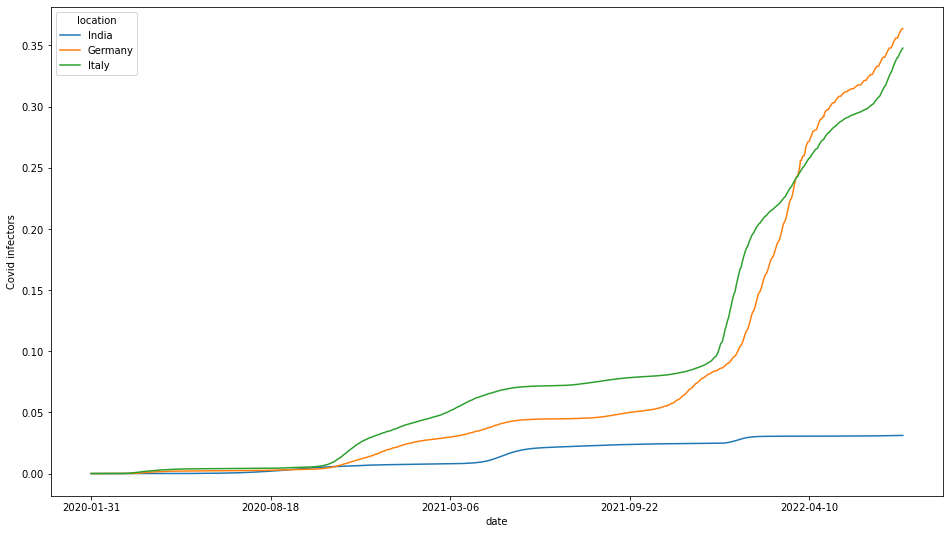

In [19]:

df_final.plot()
plt.ylabel('Covid infectors')

Text(0, 0.5, 'Vaccination rate')

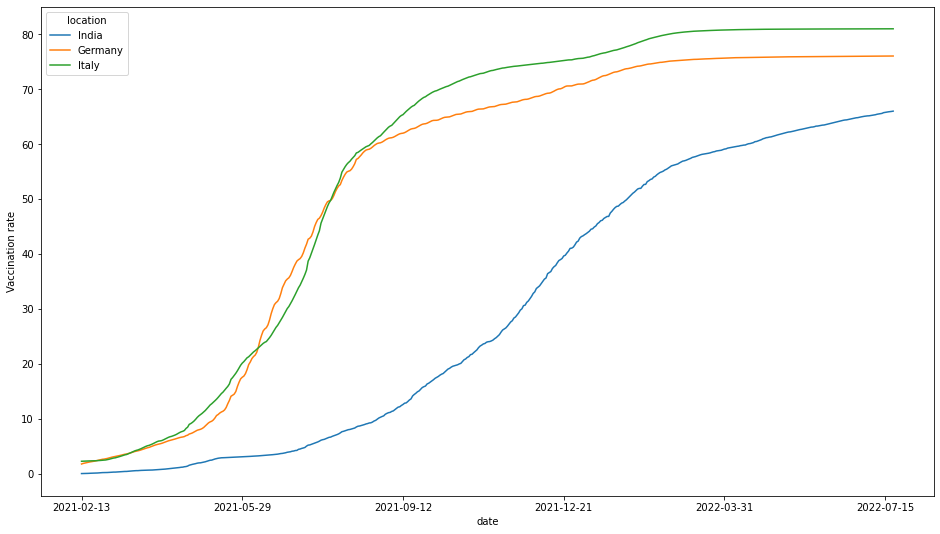

In [20]:
df_vacc.plot()
plt.ylabel('Vaccination rate')

# Doubling rate

In [27]:
def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate

        Parameters:
        ----------
        in_array : pandas.series

        Returns:
        ----------
        Doubling rate: double
    '''

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope

def savgol_filter(df_input,column='covid infectors',window=5):
    ''' Savgol Filter which can be used in groupby apply function (data structure kept)

        parameters:
        ----------
        df_input : pandas.series
        column : str
        window : int
            used data points to calculate the filter result

        Returns:
        ----------
        df_result: pd.DataFrame
            the index of the df_input has to be preserved in result
    '''

    degree=1
    df_result=df_input

    filter_in=df_input[column].fillna(0) # attention with the neutral element here

    result=signal.savgol_filter(np.array(filter_in),
                           window, # window size used for filtering
                           1)
    df_result[str(column+'_filtered')]=result
    return df_result

def rolling_reg(df_input,col='confirmed'):
    ''' Rolling Regression to approximate the doubling time'

        Parameters:
        ----------
        df_input: pd.DataFrame
        col: str
            defines the used column
        Returns:
        ---------- 
        result: pd.DataFrame
    '''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)



    return result

def calc_filtered_data(df_input,filter_on='confirmed'):
    '''  Calculate savgol filter and return merged data frame

        Parameters:
        ----------
        df_input: pd.DataFrame
        filter_on: str
            defines the used column
        Returns:
        ----------
        df_output: pd.DataFrame
            the result will be joined as a new column on the input data frame
    '''
    must_contain=set(['state','country',filter_on])
    assert must_contain.issubset(set(df_input.columns)), ' Erro in calc_filtered_data not all columns in data frame'

    df_output=df_input.copy() # we need a copy here otherwise the filter_on column will be overwritten

    pd_filtered_result=df_output[['state','country',filter_on]].groupby(['state','country']).apply(savgol_filter)#.reset_index()

    #print('--+++ after group by apply')
    #print(pd_filtered_result[pd_filtered_result['country']=='Germany'].tail())

    #df_output=pd.merge(df_output,pd_filtered_result[['index',str(filter_on+'_filtered')]],on=['index'],how='left')
    df_output=pd.merge(df_output,pd_filtered_result[[str(filter_on+'_filtered')]],left_index=True,right_index=True,how='left')
    #print(df_output[df_output['country']=='Germany'].tail())
    return df_output.copy()



def calc_doubling_rate(df_input,filter_on='confirmed'):
    ''' Calculate approximated doubling rate and return merged data frame

        Parameters:
        ----------
        df_input: pd.DataFrame
        filter_on: str
            defines the used column
        Returns:
        ----------
        df_output: pd.DataFrame
            the result will be joined as a new column on the input data frame
    '''

    must_contain=set(['state','country',filter_on])
    assert must_contain.issubset(set(df_input.columns)), ' Erro in calc_filtered_data not all columns in data frame'


    pd_DR_result= df_input.groupby(['state','country']).apply(rolling_reg,filter_on).reset_index()

    pd_DR_result=pd_DR_result.rename(columns={filter_on:filter_on+'_DR',
                             'level_2':'index'})

    #we do the merge on the index of our big table and on the index column after groupby
    df_output=pd.merge(df_input,pd_DR_result[['index',str(filter_on+'_DR')]],left_index=True,right_on=['index'],how='left')
    df_output=df_output.drop(columns=['index'])


    return df_output

if __name__ == '__main__':
    test_data_reg=np.array([2,4,6])
    result=get_doubling_time_via_regression(test_data_reg)
    print('the test slope is: '+str(result))

    pd_JH_data=pd.read_csv('data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
    pd_JH_data=pd_JH_data.sort_values('date',ascending=True).copy()

    #test_structure=pd_JH_data[((pd_JH_data['country']=='US')|
    #                  (pd_JH_data['country']=='Germany'))]

    pd_result_larg=calc_filtered_data(pd_JH_data)
    pd_result_larg=calc_doubling_rate(pd_result_larg)
    pd_result_larg=calc_doubling_rate(pd_result_larg,'confirmed_filtered')


    mask=pd_result_larg['confirmed']>100
    pd_result_larg['confirmed_filtered_DR']=pd_result_larg['confirmed_filtered_DR'].where(mask, other=np.NaN)
    pd_result_larg.to_csv('data/processed/COVID_final_set.csv',sep=';',index=False)
    print(pd_result_larg[pd_result_larg['country']=='Germany'].tail())


the test slope is: [2.]


FileNotFoundError: [Errno 2] No such file or directory: 'data/processed/COVID_relational_confirmed.csv'

# Dynamic dash board

In [ ]:
print(os.getcwd())
df_input_large=pd.read_csv('data/processed/COVID_final_set.csv',sep=';')


fig = go.Figure()

app = dash.Dash()
app.layout = html.Div([

    dcc.Markdown('''
    #  Applied Data Science on COVID-19 data

    Goal of the project is to teach data science by applying a cross industry standard process,
    it covers the full walkthrough of: automated data gathering, data transformations,
    filtering and machine learning to approximating the doubling time, and
    (static) deployment of responsive dashboard.

    '''),

    dcc.Markdown('''
    ## Multi-Select Country for visualization
    '''),


    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': each,'value':each} for each in df_input_large['country'].unique()],
        value=['US', 'Germany','Italy'], # which are pre-selected
        multi=True
    ),

    dcc.Markdown('''
        ## Select Timeline of confirmed COVID-19 cases or the approximated doubling time
        '''),


    dcc.Dropdown(
    id='doubling_time',
    options=[
        {'label': 'Timeline Confirmed ', 'value': 'confirmed'},
        {'label': 'Timeline Confirmed Filtered', 'value': 'confirmed_filtered'},
        {'label': 'Timeline Doubling Rate', 'value': 'confirmed_DR'},
        {'label': 'Timeline Doubling Rate Filtered', 'value': 'confirmed_filtered_DR'},
    ],
    value='confirmed',
    multi=False
    ),

    dcc.Graph(figure=fig, id='main_window_slope')
])



@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value'),
    Input('doubling_time', 'value')])
def update_figure(country_list,show_doubling):


    if 'doubling_rate' in show_doubling:
        my_yaxis={'type':"log",
               'title':'Approximated doubling rate over 3 days (larger numbers are better #stayathome)'
              }
    else:
        my_yaxis={'type':"log",
                  'title':'Confirmed infected people (source johns hopkins csse, log-scale)'
              }


    traces = []
    for each in country_list:

        df_plot=df_input_large[df_input_large['country']==each]

        if show_doubling=='doubling_rate_filtered':
            df_plot=df_plot[['state','country','confirmed','confirmed_filtered','confirmed_DR','confirmed_filtered_DR','date']].groupby(['country','date']).agg(np.mean).reset_index()
        else:
            df_plot=df_plot[['state','country','confirmed','confirmed_filtered','confirmed_DR','confirmed_filtered_DR','date']].groupby(['country','date']).agg(np.sum).reset_index()
       #print(show_doubling)


        traces.append(dict(x=df_plot.date,
                                y=df_plot[show_doubling],
                                mode='markers+lines',
                                opacity=0.9,
                                name=each
                        )
                )

    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,

                xaxis={'title':'Timeline',
                        'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },

                yaxis=my_yaxis
        )
    }

if __name__ == '__main__':

    app.run_server(debug=True, use_reloader=False)
